In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import datetime

#글꼴 불러오기
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

In [2]:
df = pd.read_csv('../../../Downloads/산림청 산림교육원_교육과정 조건별 선호도_20231215.csv', encoding = 'cp949')

In [3]:
df['교육대상'].unique()

array(['산림청공무원', '공무원', '산림청공무원,지차체공무원', '공무원, 관계단체직원', '공무원,공공기관직원',
       '산림청신규공무원', '산림청공무원,공공기관직원', '국방부산불담당자', '외국산림공무원', '일반인',
       '공무원,일반인', '도시녹지관리원', '일반인,공무원', '해외기업인턴,국제기구인턴', '산림청퇴직준비교육파견자',
       '산림청공무원,산림생태관리원', '공무원, 일반인', '아프라카국가산림공무원', '산불재난특수진화대원',
       '산림청연구직공무원', '공무원,관계단체직원', '산림분야전공대학생', '청원산림보호직원', '외국신림공무원관계자'],
      dtype=object)

In [4]:
#대상이 공무원인 교육 분류
df['type'] = ['공무원' in i for i in df['교육대상']]

In [5]:
df.tail(3)

,교육연도,교육구분,교육분야,교육대상,교육과정명,교육시작일자,교육종료일자,수료인원 성별 선호비율(남),수료인원 성별 선호비율(여),수료인원 성별 선호비율(남여),type
140,2023,소양교육,산림복지,공무원,메타버스숲교육,2023-11-17,2023-11-14,63,38,101,True
141,2023,전문교육,역량개발,산림청퇴직준비교육파견자,퇴직예정공무원과정,2023-11-20,2023-11-17,77,23,100,False
142,2023,국제교육,국제,외국신림공무원관계자,몽골조림관리능력배양과정,2023-11-28,2023-06-27,53,47,100,True


In [6]:
stats.ttest_ind(df[df['type']]['수료인원 성별 선호비율(여)'], df[-df['type']]['수료인원 성별 선호비율(여)'])

TtestResult(statistic=2.4739103170108407, pvalue=0.014551315788114914, df=141.0)

<Axes: xlabel='type', ylabel='수료인원 성별 선호비율(여)'>

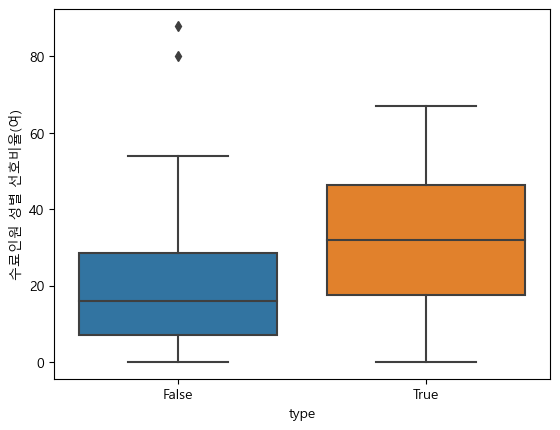

In [7]:
sns.boxplot(data = df, x='type', y = '수료인원 성별 선호비율(여)')

In [9]:
#교육날짜를 날짜형 데이터로 변환
df['교육종료일자'] = pd.to_datetime(df['교육종료일자'])
df['교육시작일자'] = pd.to_datetime(df['교육시작일자'])

#교육기간 구하기
df['교육기간'] = df['교육종료일자']-df['교육시작일자']

In [13]:
#교육기간이 음수로 출력되는 데이터는 시작일과 종료일이 반대로 적혀있다는 가정하
#음수출력되는 경우 -1 곱해서 양수로 바꿔줌

df['교육기간'] =  df['교육기간'].apply(lambda x: x if x > datetime.timedelta(0) else x * (-1))

In [15]:
#숫자로 바꿔주기
df['교육기간'] = df['교육기간'].apply(lambda x: x.days)

In [16]:
stats.pearsonr(df['교육기간'], df['수료인원 성별 선호비율(남)'])

PearsonRResult(statistic=0.024223719955806813, pvalue=0.7739795894400101)

<Axes: xlabel='교육기간', ylabel='수료인원 성별 선호비율(남)'>

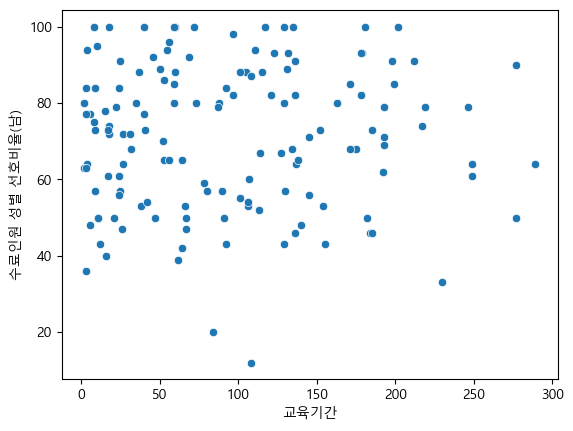

In [17]:
sns.scatterplot(data=df, x='교육기간', y='수료인원 성별 선호비율(남)')

<Axes: xlabel='교육기간', ylabel='수료인원 성별 선호비율(남)'>

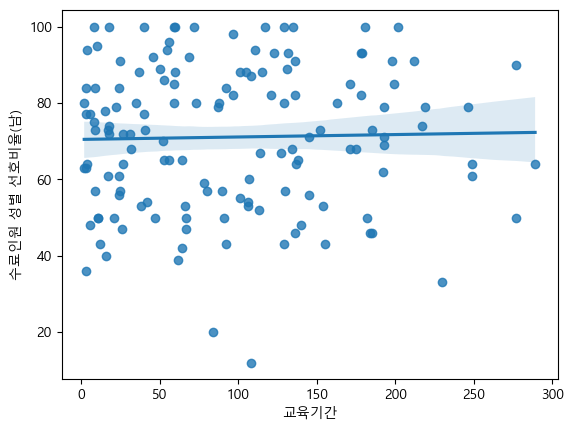

In [23]:
sns.regplot(data=df, x='교육기간', y='수료인원 성별 선호비율(남)')

In [27]:
stats.pearsonr(df['수료인원 성별 선호비율(여)'], df['수료인원 성별 선호비율(남)'])

PearsonRResult(statistic=-0.999970904512751, pvalue=1.7719417913909834e-300)

<Axes: xlabel='수료인원 성별 선호비율(여)', ylabel='수료인원 성별 선호비율(남)'>

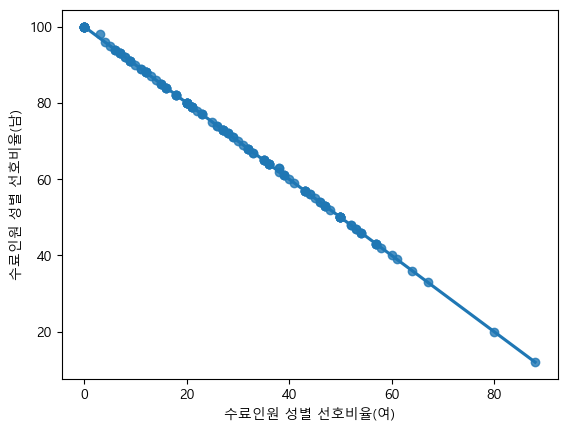

In [28]:
sns.regplot(data=df, x='수료인원 성별 선호비율(여)', y='수료인원 성별 선호비율(남)')